In [14]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sqlalchemy import create_engine
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.multitest import multipletests

In [4]:
url= 'https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/ess_combined_2012_2014.csv'
df= pd.read_csv(url)

In [5]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5,6,3,3,10,5,8,5,4,2,60,1
1,CH,25,6,6,5,7,5,9,3,2,2,59,1
2,CH,26,6,1,8,8,8,7,6,3,1,24,2
3,CH,28,6,4,6,6,7,10,6,2,2,64,1
4,CH,29,6,5,6,7,5,8,7,2,2,55,1


In [6]:
questions_2012= df[df['year']==6]
questions_2014= df[df['year']==7]

In [49]:
print(len(questions_2012))
print(len(questions_2014))

4071
4076


In [8]:
questions_2014.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
732,CH,5,7,2,8,9,7,9,6,4,1,69,1
733,CH,25,7,4,4,2,5,6,5,3,1,30,1
734,CH,26,7,3,8,8,6,8,7,5,2,49,2
735,CH,28,7,2,7,7,5,9,6,2,1,51,1
736,CH,29,7,2,4,7,0,8,6,2,2,32,2


##### Did people become less trusting from 2012 to 2014?

In [11]:
print(stats.describe(questions_2012['ppltrst']),'\n')
print(stats.describe(questions_2014['ppltrst']))

DescribeResult(nobs=4071, minmax=(0, 10), mean=5.578481945467944, variance=4.893040545067073, skewness=-0.5431086926347095, kurtosis=-0.1210956960964813) 

DescribeResult(nobs=4076, minmax=(0, 10), mean=5.5713935230618254, variance=4.927171652708959, skewness=-0.4601859476512641, kurtosis=-0.25006786100787215)


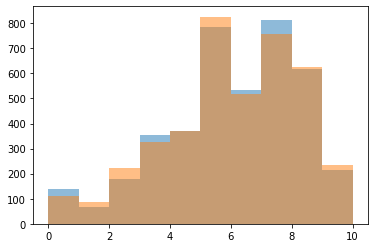

In [13]:
plt.hist(questions_2012['ppltrst'],alpha=.5)
plt.hist(questions_2014['ppltrst'],alpha=.5)
plt.show()

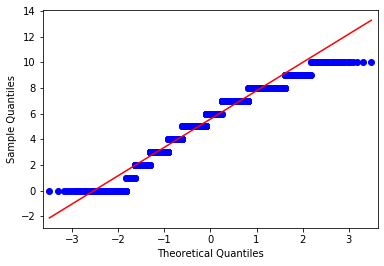

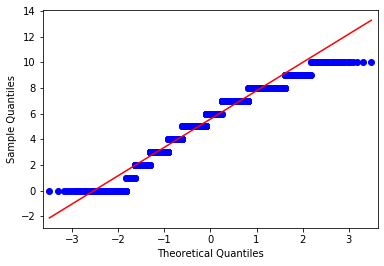

In [18]:
qqplot(questions_2012['ppltrst'],line='s')

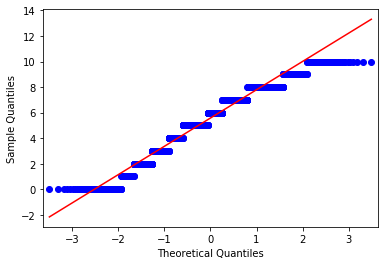

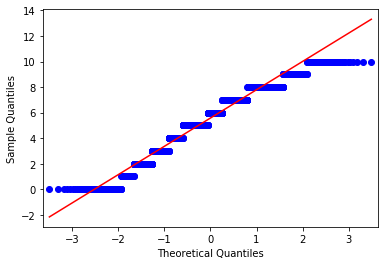

In [19]:
qqplot(questions_2014['ppltrst'],line='s')

In [23]:
stats.ttest_ind(questions_2012['ppltrst'],questions_2014['ppltrst'])

Ttest_indResult(statistic=0.1443685081969842, pvalue=0.8852130548889106)

FAIL TO REJECT THE NULL HYPOTHESIS. No siginifant difference in trust from 2012 to 2014.

##### Did people become happier from 2012 to 2014?

In [25]:
print(stats.describe(questions_2012['happy']),'\n')
print(stats.describe(questions_2014['happy']))

DescribeResult(nobs=4071, minmax=(0, 10), mean=7.731515598133137, variance=3.0819524689826823, skewness=-1.1505518232802756, kurtosis=1.9055890346061979) 

DescribeResult(nobs=4076, minmax=(0, 10), mean=7.6854759568204125, variance=2.840436853164115, skewness=-1.0296465664009635, kurtosis=1.5218046596567287)


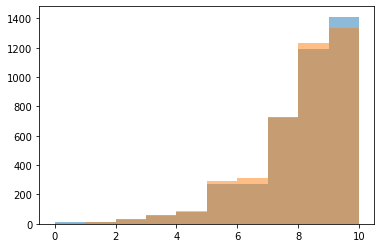

In [26]:
plt.hist(questions_2012['happy'],alpha=.5)
plt.hist(questions_2014['happy'],alpha=.5)
plt.show()

In [27]:
stats.kruskal(questions_2012['happy'],questions_2014['happy'])

KruskalResult(statistic=3.725441202182227, pvalue=0.05358946830655459)

P value is right at the .005 cutoff. Using my robust knowledge in the field I will reject the null hypothesis.

##### Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

In [28]:
df.cntry.unique()

array(['CH', 'CZ', 'DE', 'ES', 'NO', 'SE'], dtype=object)

In [87]:
country_list= ['CH','NO','SE']

In [67]:
three_countries_2014= questions_2014[questions_2014['cntry'].isin(country_list)]
three_countries_2014.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
732,CH,5,7,2,8,9,7,9,6,4,1,69,1
733,CH,25,7,4,4,2,5,6,5,3,1,30,1
734,CH,26,7,3,8,8,6,8,7,5,2,49,2
735,CH,28,7,2,7,7,5,9,6,2,1,51,1
736,CH,29,7,2,4,7,0,8,6,2,2,32,2


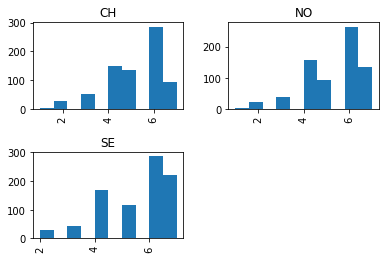

In [68]:
three_countries_2014['sclmeet'].hist(by= three_countries_2014['cntry'])
plt.show()

In [69]:
print(stats.kruskal(
    three_countries_2014.loc[three_countries_2014['cntry']=='CH',['sclmeet']],
    three_countries_2014.loc[three_countries_2014['cntry']=='NO',['sclmeet']],
    three_countries_2014.loc[three_countries_2014['cntry']=='SE',['sclmeet']]
))

KruskalResult(statistic=20.45579169855231, pvalue=3.614775009703053e-05)


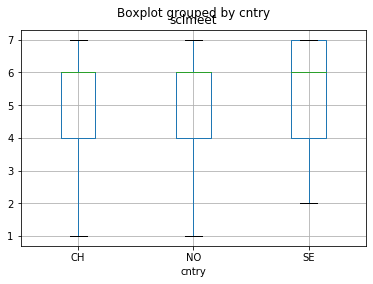

In [70]:
three_countries_2014.boxplot('sclmeet',by='cntry')
plt.show()

Sweden, Germany, China had significantly different social meeting compared to eachother.

##### Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

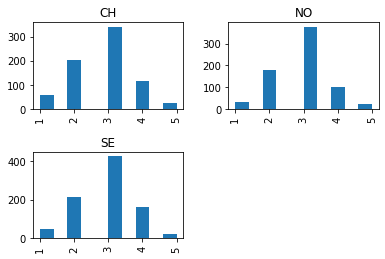

In [91]:
three_countries_2014['sclact'].hist(by= three_countries_2014['cntry'])
plt.show()

In [72]:
tc_14_by_cntry=three_countries_2014.groupby(['cntry','agea'])
tc_14_by_cntry.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
732,CH,5,7,2,8,9,7,9,6,4,1,69,1
733,CH,25,7,4,4,2,5,6,5,3,1,30,1
734,CH,26,7,3,8,8,6,8,7,5,2,49,2
735,CH,28,7,2,7,7,5,9,6,2,1,51,1
736,CH,29,7,2,4,7,0,8,6,2,2,32,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8139,SE,3716,7,2,4,6,3,7,7,3,2,15,2
8140,SE,3720,7,4,4,6,7,9,7,3,1,15,2
8141,SE,3727,7,1,6,5,5,10,7,2,1,15,2
8143,SE,3732,7,5,6,4,4,10,6,3,1,15,2


In [85]:
young_df= three_countries_2014[three_countries_2014['agea']<=30]
mid_df= three_countries_2014[three_countries_2014['agea'].between(31,60,inclusive='True')]
old_df= three_countries_2014[three_countries_2014['agea']>=61]
young_df

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
733,CH,25,7,4,4,2,5,6,5,3,1,30,1
739,CH,41,7,7,5,5,5,10,6,3,1,30,1
746,CH,68,7,7,4,2,6,10,6,3,2,26,1
749,CH,82,7,5,6,8,5,8,7,5,1,29,1
751,CH,86,7,1,7,5,8,9,7,2,1,17,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8141,SE,3727,7,1,6,5,5,10,7,2,1,15,2
8142,SE,3729,7,3,4,5,3,6,6,2,1,18,2
8143,SE,3732,7,5,6,4,4,10,6,3,1,15,2
8145,SE,3744,7,5,8,8,6,9,7,3,1,15,2


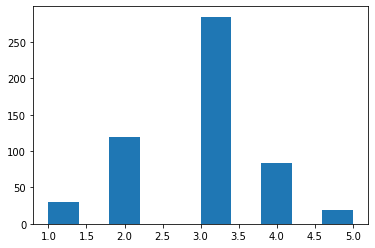

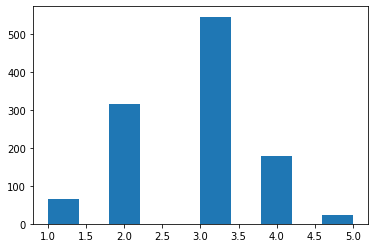

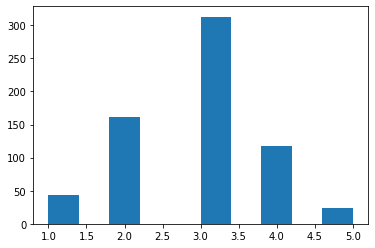

In [82]:
for elem in [young_df,mid_df,old_df]:
    plt.hist(elem['sclact'])
    plt.show()

In [99]:
young_china=young_df[young_df['cntry']=='CH']
young_sweden=young_df[young_df['cntry']=='SE']
young_norway= young_df[young_df['cntry']=='NO']

In [100]:
stats.f_oneway(young_china['sclact'],young_sweden['sclact'],young_norway['sclact'])

F_onewayResult(statistic=1.2647221506206474, pvalue=0.28316355035522633)

In [93]:

for elem in [young_df,mid_df,old_df]:
    for country in country_list:
        elem[elem['cntry']==country]

In [101]:
young_china= mid_df[mid_df['cntry']=='CH']
young_sweden= mid_df[mid_df['cntry']=='SE']
young_norway= mid_df[mid_df['cntry']=='NO']

In [102]:
stats.f_oneway(young_china['sclact'],young_sweden['sclact'],young_norway['sclact'])

F_onewayResult(statistic=0.17664668557436877, pvalue=0.8380991189974376)

In [103]:
young_china= old_df[old_df['cntry']=='CH']
young_sweden= old_df[old_df['cntry']=='SE']
young_norway= old_df[old_df['cntry']=='NO']

In [104]:
stats.f_oneway(young_china['sclact'],young_sweden['sclact'],young_norway['sclact'])

F_onewayResult(statistic=2.820041382945625, pvalue=0.060325176009411605)

In [107]:
tukey = pairwise_tukeyhsd(endog = old_df['sclact'],      # Data
                          groups = old_df['cntry'],   # Groups
                          alpha=0.08) 

In [108]:
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
CH,NO,0.1812,0.1355,-0.0228,0.3853,False
CH,SE,0.1885,0.0675,0.0061,0.3709,True
NO,SE,0.0073,0.9,-0.177,0.1915,False


The older population have different levels of social interaction compared to old people in Sweden.